In [1]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

import math
import random

In [2]:
image_dir = "./Data/"
data_list = []

folderNames = os.listdir(image_dir)
folders = [x.split(".")[0] for x in folderNames]
folders = [folder for folder in folders if folder != '']
for x in folders:
    fileNames = os.listdir(image_dir + x)
    files = [x for x in fileNames]
    datas = pd.DataFrame({"filename": files, "label": x})
    data_list.append(datas)

data = pd.concat(data_list, ignore_index=True)
data = data[data['label'] != '']
data.reset_index(drop=True, inplace=True)

In [27]:
data_list

[            filename label
 0       2531_cat.jpg   Cat
 1       7317_cat.jpg   Cat
 2       5577_cat.jpg   Cat
 3      10310_cat.jpg   Cat
 4      12408_cat.jpg   Cat
 ...              ...   ...
 12497  11236_cat.jpg   Cat
 12498   2884_cat.jpg   Cat
 12499   1277_cat.jpg   Cat
 12500   3417_cat.jpg   Cat
 12501   6231_cat.jpg   Cat
 
 [12502 rows x 2 columns],
             filename label
 0       7143_dog.jpg   Dog
 1       6449_dog.jpg   Dog
 2       2765_dog.jpg   Dog
 3        846_dog.jpg   Dog
 4       4229_dog.jpg   Dog
 ...              ...   ...
 12497   2349_dog.jpg   Dog
 12498   6065_dog.jpg   Dog
 12499  12308_dog.jpg   Dog
 12500   3643_dog.jpg   Dog
 12501   9396_dog.jpg   Dog
 
 [12502 rows x 2 columns]]

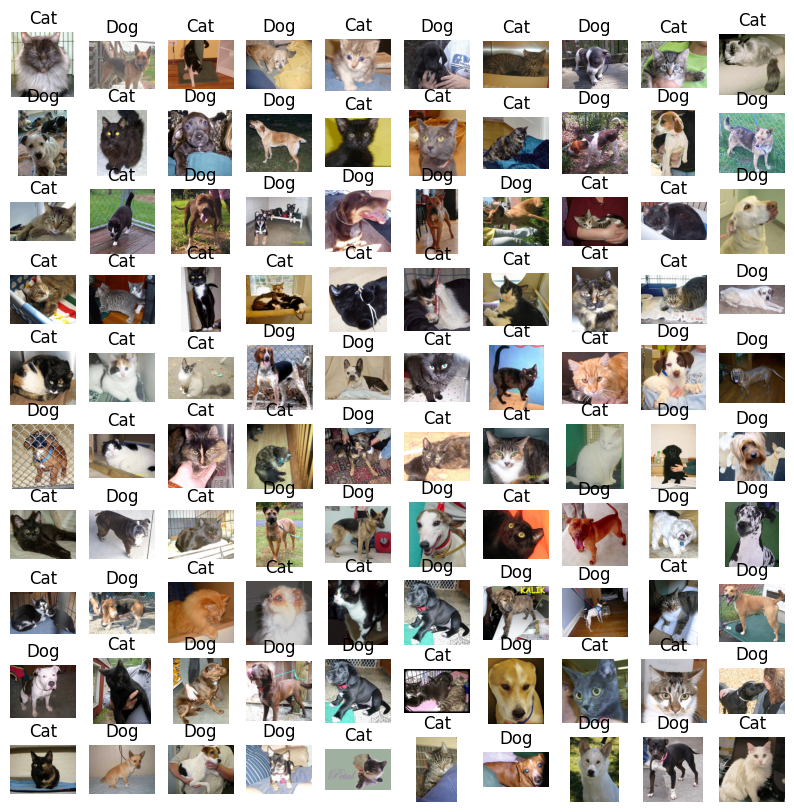

In [3]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
random_numbers = [random.randint(0, 25000) for _ in range(numbers_to_display)]
a = 0
for i in random_numbers:
    name = data.iloc[i]['filename']
    folder = data.iloc[i]['label']
    path = image_dir + folder + "/" + name
    plt.subplot(num_cells,num_cells, a+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = imread(path)
    plt.imshow(image)
    plt.title(folder)
    plt.axis('off')
    a += 1
    
plt.show()

In [4]:
folders

['Cat', 'Dog']

In [5]:
labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20003, 2)
The shape of test data (2500, 2)
The shape of validation data (2501, 2)


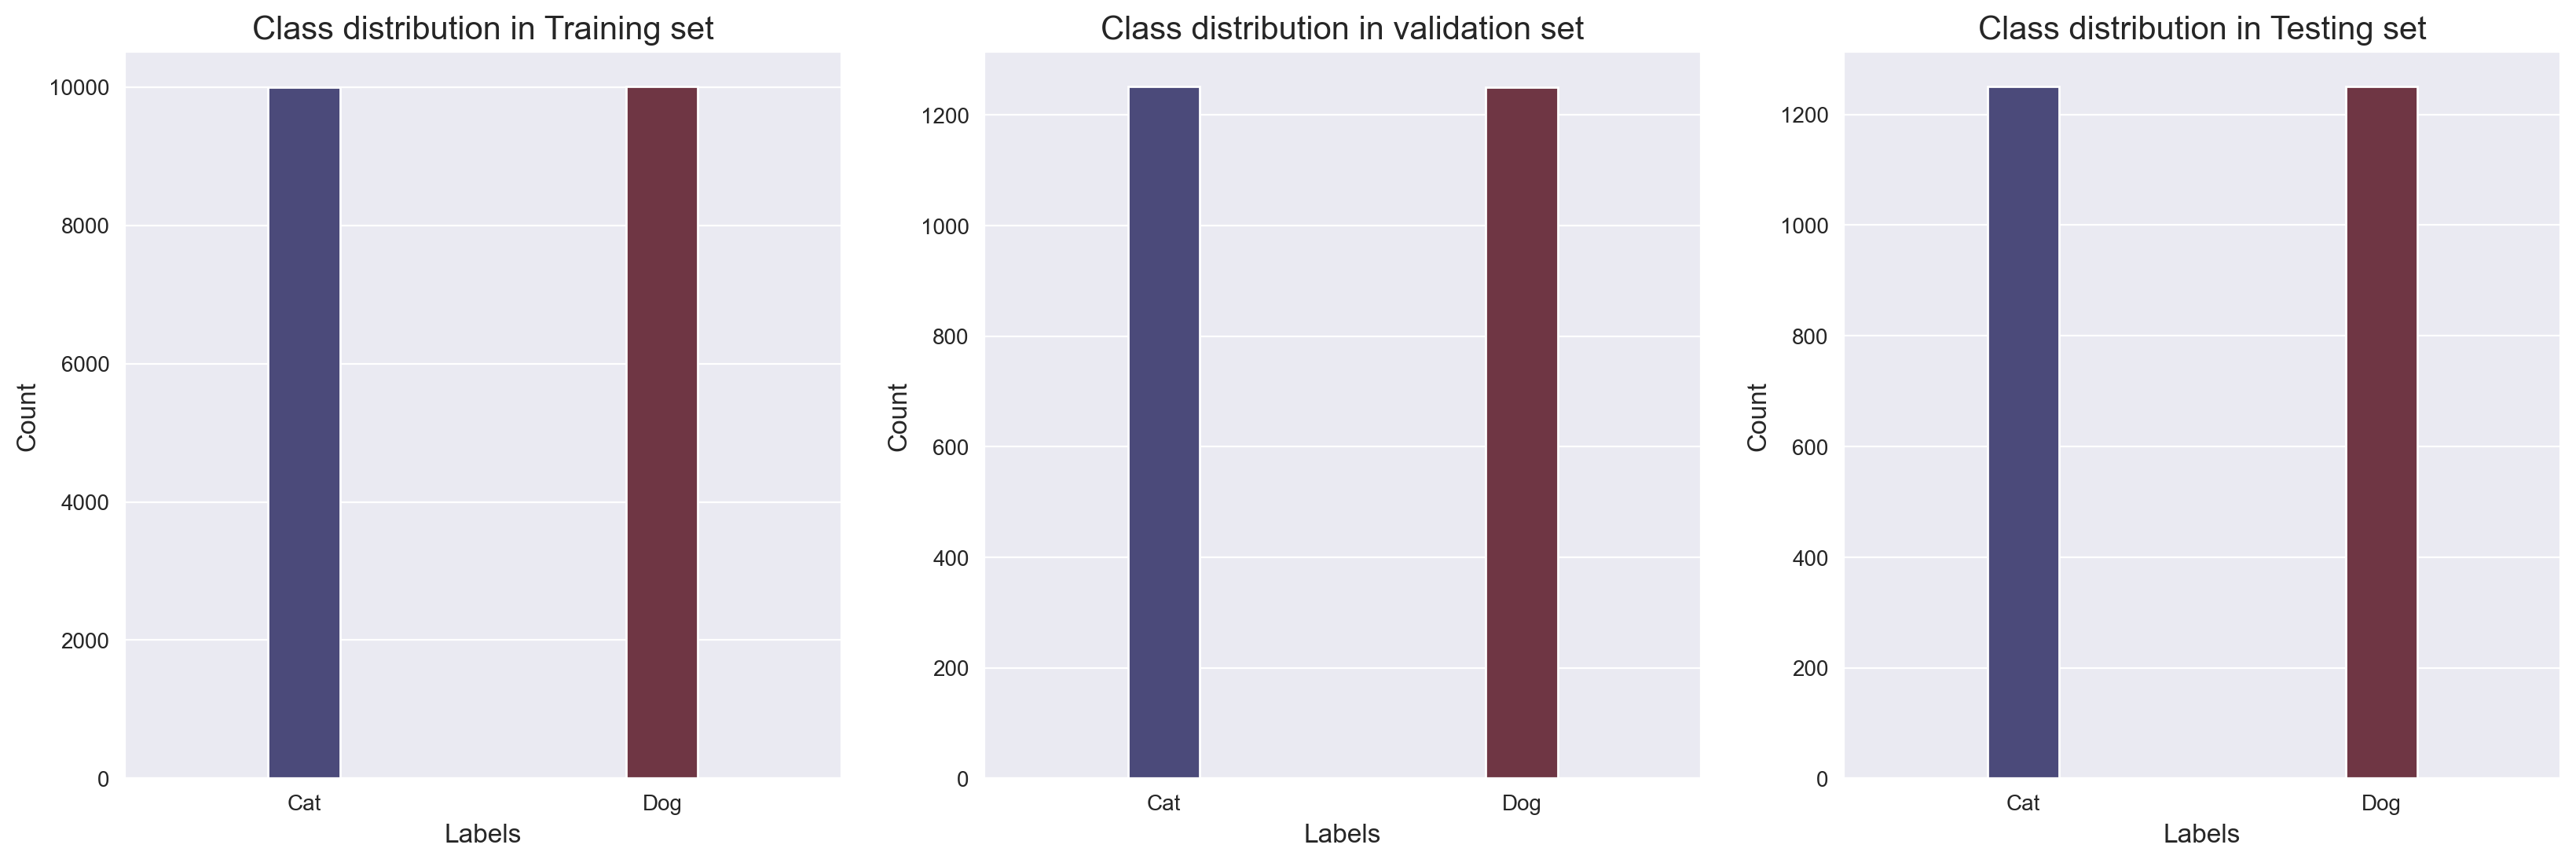

In [6]:
labels = folders

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

In [7]:
image_size = 128
image_channel = 3
bat_size = 32

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
X_train

filename label
10179   7286_cat.jpg   Cat
7393    4778_cat.jpg   Cat
476     5103_cat.jpg   Cat
513     4334_cat.jpg   Cat
2440    1177_cat.jpg   Cat
...              ...   ...
15774   5739_dog.jpg   Dog
17940  11715_dog.jpg   Dog
226     2492_cat.jpg   Cat
5165     591_cat.jpg   Cat
23142   2504_dog.jpg   Dog

[20003 rows x 2 columns]

In [10]:
X_train = X_train[(X_train['filename'].str.contains('.jpg'))]
X_train = X_train[(X_train['filename'] != '11702_dog.jpg')]
X_train = X_train[(X_train['filename'] != '666_cat.jpg')]
X_train.reset_index(drop=True, inplace=True)


X_val = X_val[(X_val['filename'].str.contains('.jpg'))]

X_val.reset_index(drop=True, inplace=True)

for x in X_train['filename']:
        try:
            image = Image.open(os.path.join("./public/", x))
        except Exception as e:
            print(f"Error opening {filename}: {e}")
        
        
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = 'public/',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val, 
                                                 directory = 'public/',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test, 
                                                  directory = 'public/',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

/Users/leechongkeat/miniforge3/envs/deep-learning/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Found 19998 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [11]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))

model.summary()

Metal device set to: Apple M2 Pro


2023-09-19 22:24:57.994604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-19 22:24:57.994622: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator, 
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30
                   )

Epoch 1/30


2023-09-19 22:24:58.717542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


603/625 [===========================>..] - ETA: 1s - loss: 0.6442 - accuracy: 0.6651

/Users/leechongkeat/miniforge3/envs/deep-learning/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - ETA: 0s - loss: 0.6411 - accuracy: 0.6670

2023-09-19 22:25:53.090780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 58s 92ms/step - loss: 0.6411 - accuracy: 0.6670 - val_loss: 0.5911 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 57s 92ms/step - loss: 0.5077 - accuracy: 0.7531 - val_loss: 0.4625 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 58s 92ms/step - loss: 0.4394 - accuracy: 0.7956 - val_loss: 0.4584 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 57s 91ms/step - loss: 0.3830 - accuracy: 0.8304 - val_loss: 0.3392 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 58s 92ms/step - loss: 0.3448 - accuracy: 0.8499 - val_loss: 0.3465 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - ETA: 0s - loss: 0.3157 - accuracy: 0.8627
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 [==============================] - 57s 92ms/st

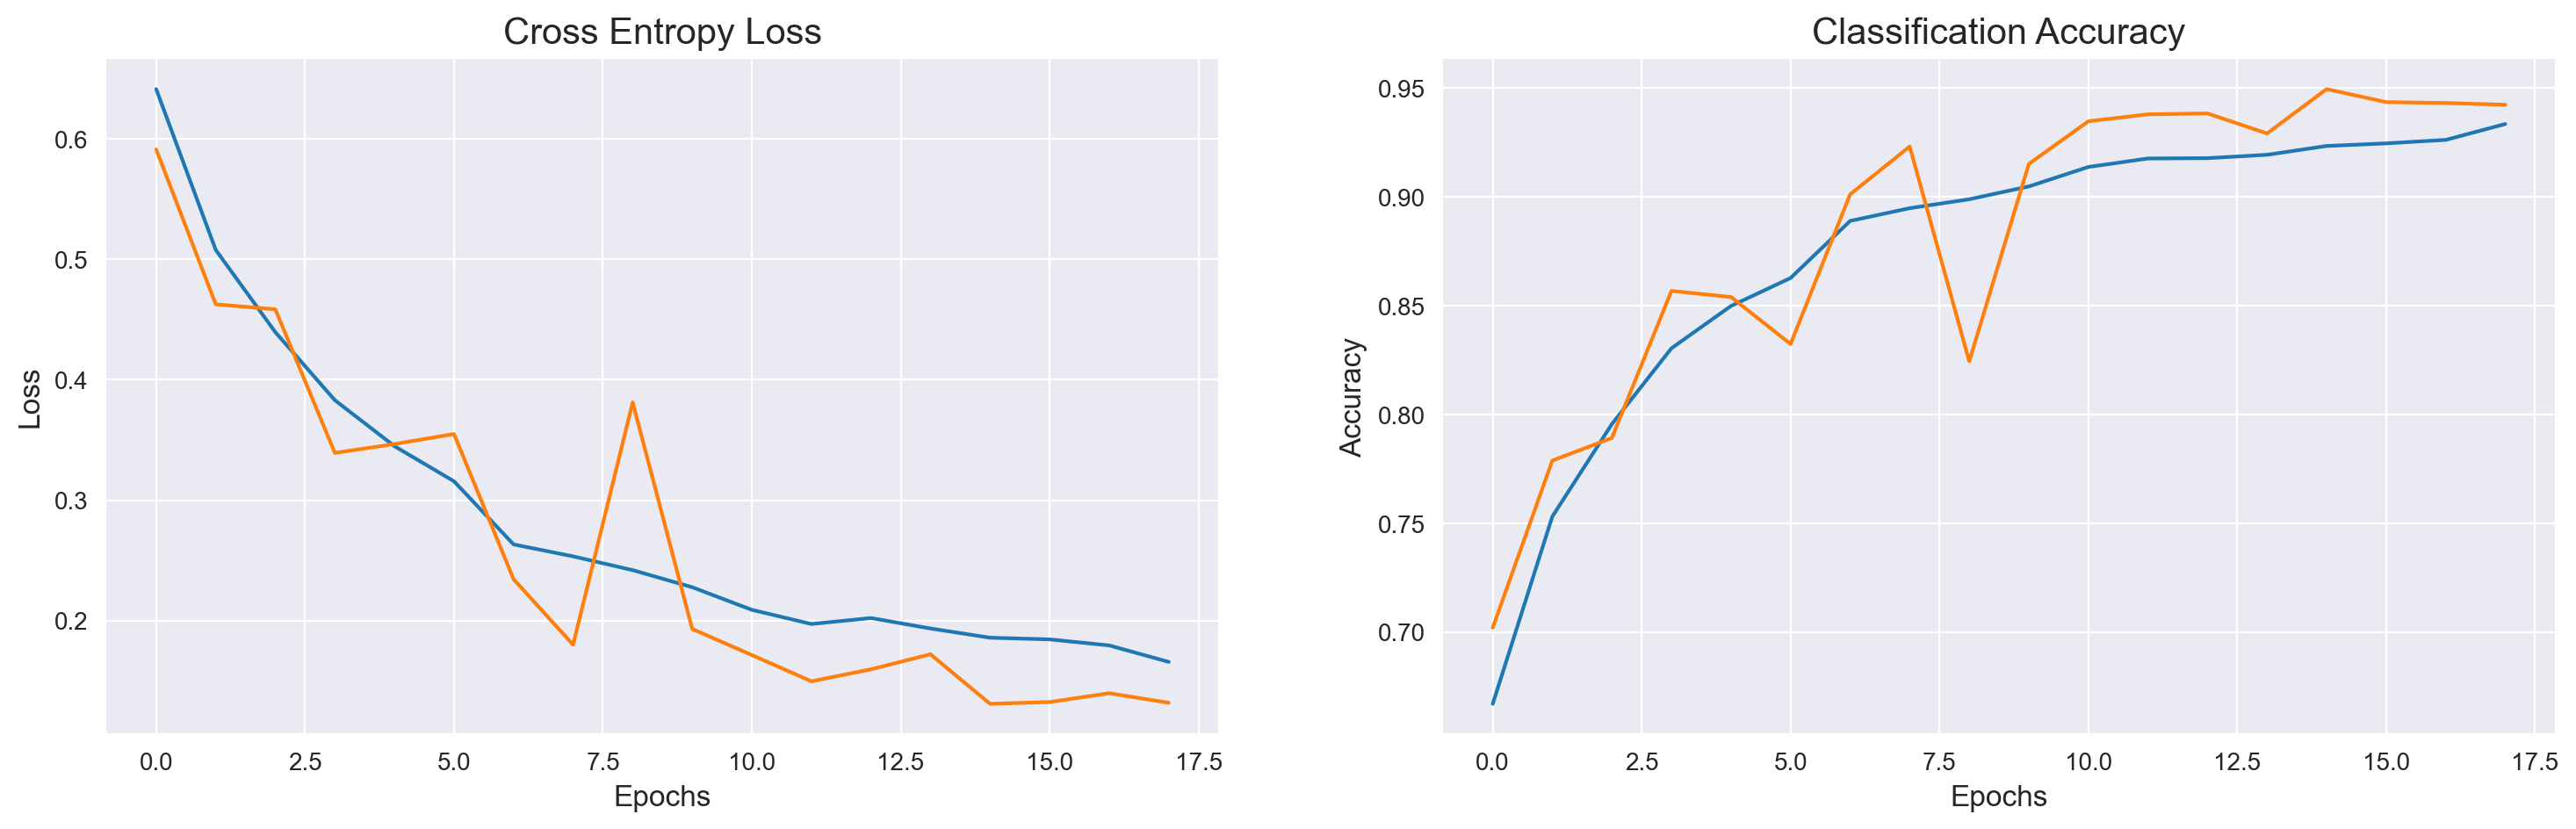

In [15]:
error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [16]:
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

/Users/leechongkeat/miniforge3/envs/deep-learning/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


The accuracy of the model for training data is: 95.10450959205627
The Loss of the model for training data is: 0.1268642544746399
The accuracy of the model for validation data is: 94.95999813079834
The Loss of the model for validation data is: 0.1309928596019745


In [17]:
model.save("model.h5")

/Users/leechongkeat/miniforge3/envs/deep-learning/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

2023-09-19 22:45:54.870480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


The accuracy of the model for testing data is: 93.72000098228455
The Loss of the model for testing data is: 0.14746658504009247


In [30]:
def is_dog(parameter):
    if parameter == "Dog":
        return 1
    else:
        return 0
    
def is_dog_text(parameter):
    if parameter == 1:
        return "Dog"
    else:
        return "Cat"

In [53]:
numbers_to_display = 50
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(30,30))
random_numbers = [random.randint(0, 2500) for _ in range(numbers_to_display)]
a = 0
for i in random_numbers:
    predicted_label = y_pred[i]
    name = X_test.iloc[i]['filename']
    folder = X_test.iloc[i]['label']
    path = image_dir + folder + "/" + name
    plt.subplot(num_cells,num_cells, a+1)
    plt.grid(False)
    color_map = 'Green' if predicted_label == is_dog(X_test.iloc[i]['label']) else 'Red'
    image = imread(path)
    plt.imshow(image)
    plt.title(is_dog_text(predicted_label), color=color_map, fontsize=25)
    plt.axis('off')
    a += 1
    
plt.show()